# Model Comparison
> "Comparing and choosing best performing model"
- toc: true
- branch: master
- badges: true
- comments: true
- author: Thomas Adler
- image: images/comparison.png
- categories: [fastpages, jupyter]

## Uganda Water Infrastructure

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [fastpages, jupyter]
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

# Model comparison

In [1]:
# importing relevant packages and functions
%run /Users/thomasadler/Desktop/futuristic-platipus/capstone/notebooks/ta_01_packages_functions.py

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Preparing data

In [2]:
#load all csv files
path = model_filepath
csv_files = glob.glob(path + "/*.csv")

#concatenate all files
all_models_comparison = []

for file in csv_files:
    df = pd.read_csv(file, index_col=None, header=0)
    all_models_comparison.append(df)

#make it into a dataframe
model_comparison_df = pd.concat(all_models_comparison, axis=0, ignore_index=True)
model_comparison_df=model_comparison_df.iloc[:,1:]

#check
model_comparison_df

,Model,Parameters,Accuracy Train,Precision Train,Recall Train,F1 Train,ROC AUC Train,Accuracy Test,Precision Test,Recall Test,...,ROC AUC Test,Time Fit,Time Predict,Precision Non-functioning Test,Recall Non-functioning Test,F1 Non-functioning Test,Precision Functioning Test,Recall Functioning Test,F1 Functioning Test,Functioning Test
0,XGBoost,"Max depth=6, Gamma=0, Learning rate=0.3, Numbe...",0.841840,0.842494,0.841840,0.841765,0.924392,0.771517,0.813022,0.771517,...,0.808766,19.921147,0.038439,0.45,0.65,0.53,0.90,0.80,0.85,NaN
1,WPDx,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,[0.80834636 0.80834439 0.8083527 ... 1. ...,[1.00000000e+00 9.99987281e-01 9.99987281e-01 ...,...,0.788902,NaN,NaN,0.54,0.40,0.46,0.87,0.92,0.89,NaN
2,K Nearest Neighbors,"Neighbors=4, Standard Scaler",0.870462,0.884488,0.870462,0.869269,0.967214,0.678122,0.781206,0.678122,...,0.720382,0.034317,0.166168,0.33,0.65,0.44,0.89,0.69,0.77,NaN
3,Gaussian Naive Bayes,NaN,0.612033,0.614446,0.612033,0.609977,0.658882,0.642347,0.727009,0.642347,...,0.615479,0.140393,0.028196,0.27,0.47,0.34,0.84,0.69,0.75,NaN
4,Neural Network,"Hidden layer=16 nodes, Optimizer=Adam, Loss fu...",NaN,NaN,NaN,NaN,0.858612,NaN,NaN,NaN,...,0.788690,323.817263,0.787798,0.42,0.63,0.50,0.90,0.78,NaN,0.84
5,Linear SVC,"Penalty=l2, C=0.001, Standard Scaler",0.652100,0.652120,0.652100,0.652089,0.710458,0.631198,0.74105,0.631198,...,0.640733,1.170683,0.019465,0.28,0.55,0.37,0.85,0.65,0.74,NaN
6,Decision Tree,"Max depth=24, Min samples leaf=25, Criterion=e...",0.840586,0.840826,0.840586,0.840558,0.929668,0.751038,0.798911,0.751038,...,0.774382,3.789587,0.015336,0.41,0.62,0.49,0.89,0.78,0.83,NaN
7,Random Forest,"Max depth=31, Min samples leaf=11, Criterion=e...",0.897099,0.897332,0.897099,0.897084,0.966498,0.792881,0.817337,0.792881,...,0.823229,52.538480,0.515494,0.48,0.62,0.54,0.90,0.83,0.87,NaN
8,AdaBoost,"Learning rate=1, Number of trees=50",0.704895,0.706307,0.704895,0.704390,0.777469,0.657461,0.769839,0.657461,...,0.708767,33.512388,0.300903,0.32,0.64,0.42,0.88,0.66,0.76,NaN
9,Logistic Regression,"Penalty=l2, C=0.1, Standard Scaler",0.651419,0.651419,0.651419,0.651419,0.710467,0.626813,0.741167,0.626813,...,0.640127,0.397975,0.001858,0.65,0.65,0.65,0.65,0.65,0.65,NaN


In [3]:
#load all numpy array files for train-representing roc curves

#logistic regression
fpr_train_lr = np.load(model_filepath+'logistic_regression_fpr_train_opt.npy')
tpr_train_lr = np.load(model_filepath+'logistic_regression_tpr_train_opt.npy')
auc_train_lr = model_comparison_df[model_comparison_df['Model']=='Logistic Regression']['ROC AUC Train']

#k nearest neighbors
fpr_train_knn = np.load(model_filepath+'k_nearest_neighbors_fpr_train_opt.npy')
tpr_train_knn = np.load(model_filepath+'k_nearest_neighbors_tpr_train_opt.npy')
auc_train_knn = model_comparison_df[model_comparison_df['Model']=='K Nearest Neighbors']['ROC AUC Train']

#decision tree
fpr_train_dt = np.load(model_filepath+'decision_tree_fpr_train_opt.npy')
tpr_train_dt = np.load(model_filepath+'decision_tree_tpr_train_opt.npy')
auc_train_dt = model_comparison_df[model_comparison_df['Model']=='Decision Tree']['ROC AUC Train']

#random forest
fpr_train_rf = np.load(model_filepath+'random_forest_fpr_train_opt.npy')
tpr_train_rf = np.load(model_filepath+'random_forest_tpr_train_opt.npy')
auc_train_rf = model_comparison_df[model_comparison_df['Model']=='Random Forest']['ROC AUC Train']

#gaussian naive bayes
fpr_train_gnb = np.load(model_filepath+'gaussian_naive_bayes_fpr_train_base.npy')
tpr_train_gnb = np.load(model_filepath+'gaussian_naive_bayes_tpr_train_base.npy')
auc_train_gnb = model_comparison_df[model_comparison_df['Model']=='Gaussian Naive Bayes']['ROC AUC Train']

#support vector machine
fpr_train_svm = np.load(model_filepath+'support_vector_machine_fpr_train_base.npy')
tpr_train_svm = np.load(model_filepath+'support_vector_machine_tpr_train_base.npy')
auc_train_svm = model_comparison_df[model_comparison_df['Model']=='Linear SVC']['ROC AUC Train']

#adaboost
fpr_train_ab = np.load(model_filepath+'adaboost_fpr_train_base.npy')
tpr_train_ab = np.load(model_filepath+'adaboost_tpr_train_base.npy')
auc_train_ab = model_comparison_df[model_comparison_df['Model']=='AdaBoost']['ROC AUC Train']

#xgboost
fpr_train_xg = np.load(model_filepath+'xgboost_fpr_train_base.npy')
tpr_train_xg = np.load(model_filepath+'xgboost_tpr_train_base.npy')
auc_train_xg = model_comparison_df[model_comparison_df['Model']=='XGBoost']['ROC AUC Train']

#neural network
fpr_train_nn = np.load(model_filepath+'neural_network_fpr_train_opt.npy')
tpr_train_nn = np.load(model_filepath+'neural_network_tpr_train_opt.npy')
auc_train_nn = model_comparison_df[model_comparison_df['Model']=='Neural Network']['ROC AUC Train']


I had to save the arrays of our false positive and true positive rates for varying thresholds in specific numpy files. This was to keep the array format to more easily plot it.

In [4]:
#load all numpy array files for test-representing roc curves

#logistic regression
fpr_test_lr = np.load(model_filepath+'logistic_regression_fpr_test_opt.npy')
tpr_test_lr = np.load(model_filepath+'logistic_regression_tpr_test_opt.npy')
auc_test_lr = model_comparison_df[model_comparison_df['Model']=='Logistic Regression']['ROC AUC Test']

#k nearest neighbors
fpr_test_knn = np.load(model_filepath+'k_nearest_neighbors_fpr_test_opt.npy')
tpr_test_knn = np.load(model_filepath+'k_nearest_neighbors_tpr_test_opt.npy')
auc_test_knn = model_comparison_df[model_comparison_df['Model']=='K Nearest Neighbors']['ROC AUC Test']

#decision tree
fpr_test_dt = np.load(model_filepath+'decision_tree_fpr_test_opt.npy')
tpr_test_dt = np.load(model_filepath+'decision_tree_tpr_test_opt.npy')
auc_test_dt = model_comparison_df[model_comparison_df['Model']=='Decision Tree']['ROC AUC Test']

#random forest
fpr_test_rf = np.load(model_filepath+'random_forest_fpr_test_opt.npy')
tpr_test_rf = np.load(model_filepath+'random_forest_tpr_test_opt.npy')
auc_test_rf = model_comparison_df[model_comparison_df['Model']=='Random Forest']['ROC AUC Test']

#gaussian naive bayes
fpr_test_gnb = np.load(model_filepath+'gaussian_naive_bayes_fpr_test_base.npy')
tpr_test_gnb = np.load(model_filepath+'gaussian_naive_bayes_tpr_test_base.npy')
auc_test_gnb = model_comparison_df[model_comparison_df['Model']=='Gaussian Naive Bayes']['ROC AUC Test']

#support vector machine
fpr_test_svm = np.load(model_filepath+'support_vector_machine_fpr_test_base.npy')
tpr_test_svm = np.load(model_filepath+'support_vector_machine_tpr_test_base.npy')
auc_test_svm = model_comparison_df[model_comparison_df['Model']=='Linear SVC']['ROC AUC Test']

#adaboost
fpr_test_ab = np.load(model_filepath+'adaboost_fpr_test_base.npy')
tpr_test_ab = np.load(model_filepath+'adaboost_tpr_test_base.npy')
auc_test_ab = model_comparison_df[model_comparison_df['Model']=='AdaBoost']['ROC AUC Test']

#xgboost
fpr_test_xg = np.load(model_filepath+'xgboost_fpr_test_base.npy')
tpr_test_xg = np.load(model_filepath+'xgboost_tpr_test_base.npy')
auc_test_xg = model_comparison_df[model_comparison_df['Model']=='XGBoost']['ROC AUC Test']

#neural network
fpr_test_nn = np.load(model_filepath+'neural_network_fpr_test_opt.npy')
tpr_test_nn = np.load(model_filepath+'neural_network_tpr_test_opt.npy')
auc_test_nn = model_comparison_df[model_comparison_df['Model']=='Neural Network']['ROC AUC Test']

#wpdx
fpr_test_wpdx = np.load(model_filepath+'wpdx_fpr_wpdx.npy')
tpr_test_wpdx = np.load(model_filepath+'wpdx_tpr_wpdx.npy')
auc_test_wpdx = model_comparison_df[model_comparison_df['Model']=='WPDx']['ROC AUC Test']


# ROC Curve for Train/Test

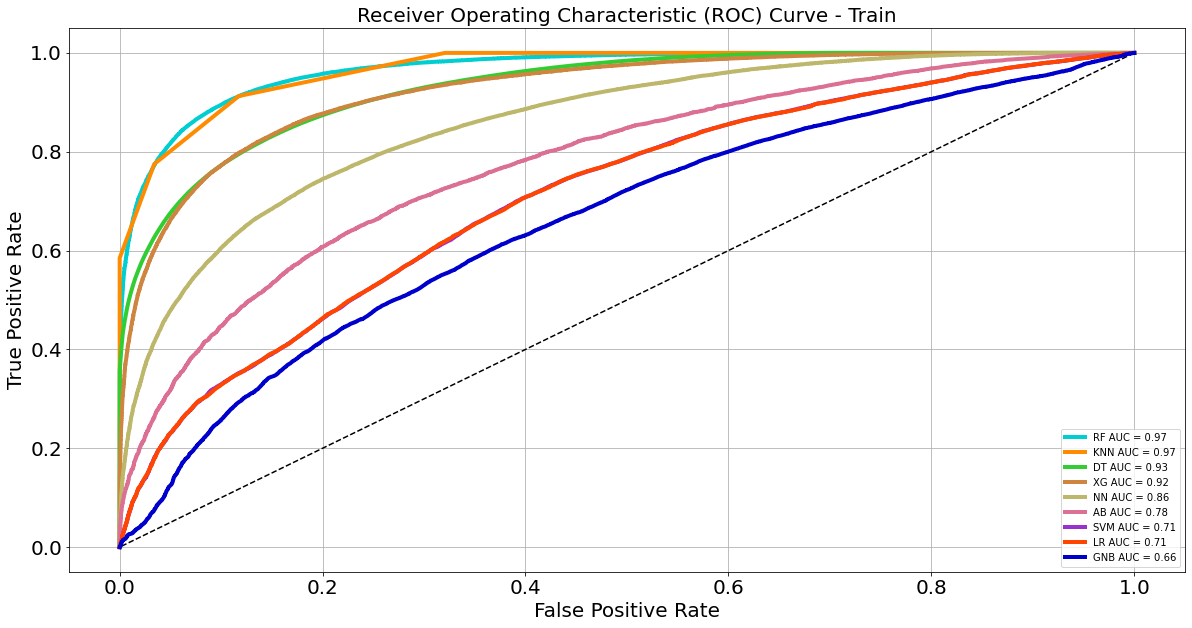

In [5]:
#create visualisation
plt.figure(figsize=(20,10))

plt.plot([1,0], [1,0], color='black', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve - Train', size=20)

#visualise each roc curve
plt.plot(fpr_train_rf, tpr_train_rf, color='darkturquoise', lw=4, label='RF AUC = %0.2f' % auc_train_rf)
plt.plot(fpr_train_knn, tpr_train_knn, color='darkorange', lw=4, label='KNN AUC = %0.2f' % auc_train_knn)
plt.plot(fpr_train_dt, tpr_train_dt, color='limegreen', lw=4, label='DT AUC = %0.2f' % auc_train_dt)
plt.plot(fpr_train_xg, tpr_train_xg, color='peru', lw=4, label='XG AUC = %0.2f' % auc_train_xg)
plt.plot(fpr_train_nn, tpr_train_nn, color='darkkhaki', lw=4, label='NN AUC = %0.2f' % auc_train_nn)
plt.plot(fpr_train_ab, tpr_train_ab, color='palevioletred', lw=4, label='AB AUC = %0.2f' % auc_train_ab)
plt.plot(fpr_train_svm, tpr_train_svm, color='darkorchid', lw=4, label='SVM AUC = %0.2f' % auc_train_svm)
plt.plot(fpr_train_lr, tpr_train_lr, color='orangered', lw=4, label='LR AUC = %0.2f' % auc_train_lr)
plt.plot(fpr_train_gnb, tpr_train_gnb, color='mediumblue', lw=4, label='GNB AUC = %0.2f' % auc_train_gnb)

plt.xlabel('False Positive Rate', size=20)
plt.ylabel('True Positive Rate', size=20)

plt.xticks(size=20)
plt.yticks(size=20)

plt.legend(loc="best")

plt.grid()

For the train dataset, the best performing models are KNN and Random Forest while the worst performing ones are the Naive Bayes and Logistic Regression.

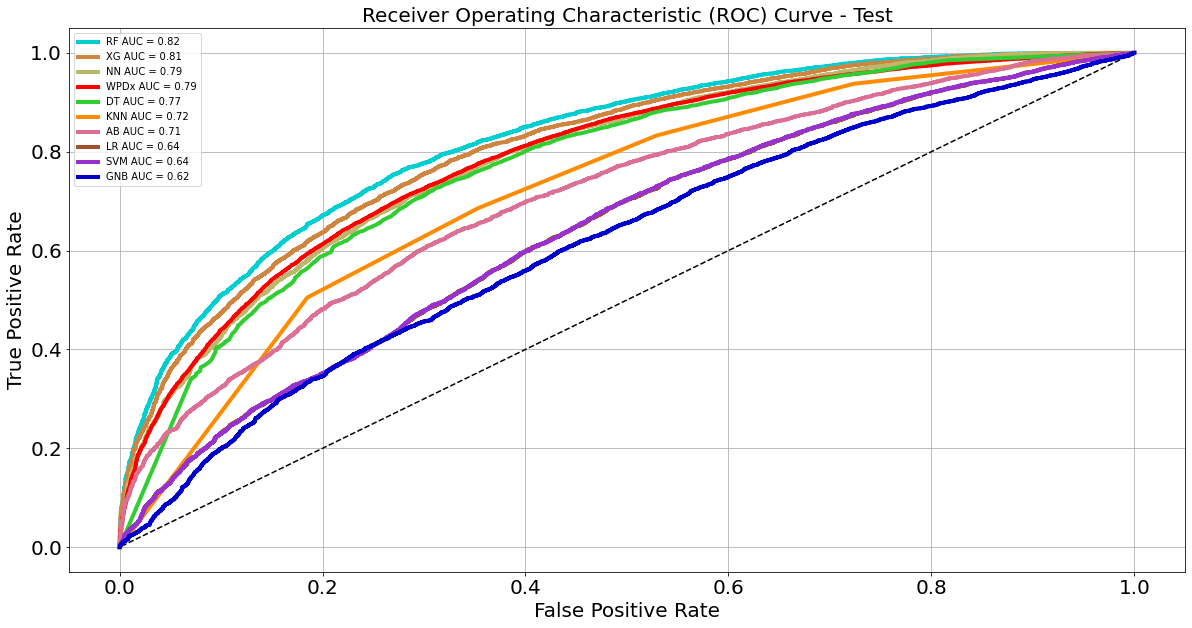

In [6]:
#create visualisation
plt.figure(figsize=(20,10))

plt.plot([1,0], [1,0], color='black', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test', size=20)

#visualise each roc curve
plt.plot(fpr_test_rf, tpr_test_rf, color='darkturquoise', lw=4, label='RF AUC = %0.2f' % auc_test_rf)
plt.plot(fpr_test_xg, tpr_test_xg, color='peru', lw=4, label='XG AUC = %0.2f' % auc_test_xg)
plt.plot(fpr_test_nn, tpr_test_nn, color='darkkhaki', lw=4, label='NN AUC = %0.2f' % auc_test_nn)
plt.plot(fpr_test_wpdx, tpr_test_wpdx, color='Red', lw=4, label='WPDx AUC = %0.2f' % auc_test_wpdx)
plt.plot(fpr_test_dt, tpr_test_dt, color='limegreen', lw=4, label='DT AUC = %0.2f' % auc_test_dt)
plt.plot(fpr_test_knn, tpr_test_knn, color='darkorange', lw=4, label='KNN AUC = %0.2f' % auc_test_knn)
plt.plot(fpr_test_ab, tpr_test_ab, color='palevioletred', lw=4, label='AB AUC = %0.2f' % auc_test_ab)
plt.plot(fpr_test_lr, tpr_test_lr, color='sienna', lw=4, label='LR AUC = %0.2f' % auc_test_lr)
plt.plot(fpr_test_svm, tpr_test_svm, color='darkorchid', lw=4, label='SVM AUC = %0.2f' % auc_test_svm)
plt.plot(fpr_test_gnb, tpr_test_gnb, color='mediumblue', lw=4, label='GNB AUC = %0.2f' % auc_test_gnb)



plt.xlabel('False Positive Rate', size=20)
plt.ylabel('True Positive Rate', size=20)

plt.xticks(size=20)
plt.yticks(size=20)

plt.legend(loc="best")

plt.grid()

Similarly to the training set, Random Forest has the largest AUC on the test set, followed closely by XGBoost and our Neural Network. KNN shows large overfitting as it did very well on the train set but not so well on the test set. Naive Bayes, Support Vector Machine and Logistic Regression all perform poorly on the test set.

# Plot accuracy score for Train/Test

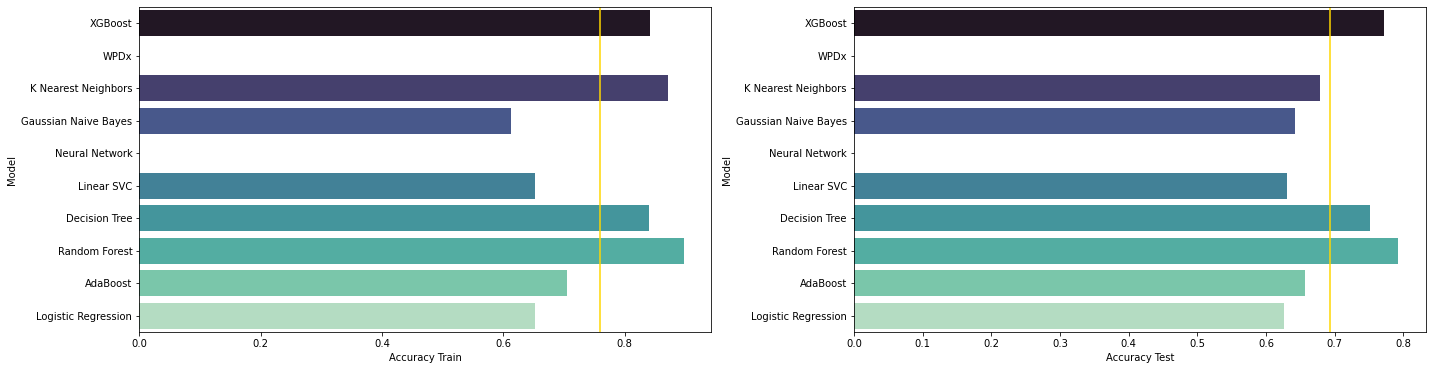

In [7]:
#list of metrics
accuracies=['Accuracy Train', 'Accuracy Test']

#visualise metrics
plt.subplots(1,2, figsize=(20,15))

for i, accuracy in enumerate(accuracies, 1):
    plt.subplot(3,2,i)
    sns.barplot(data=model_comparison_df, x=accuracy, y='Model', palette='mako')
    plt.axvline(model_comparison_df[accuracy].mean(), c='gold', label='mean')
plt.tight_layout()
plt.show()  

The visualisation above show us that the best performing models, in terms of accuracy on the test set, are Random Forest, XGBoost and Decision Tree. Support Vector Machine and Naive Bayes, again, have poor accuracy scores.

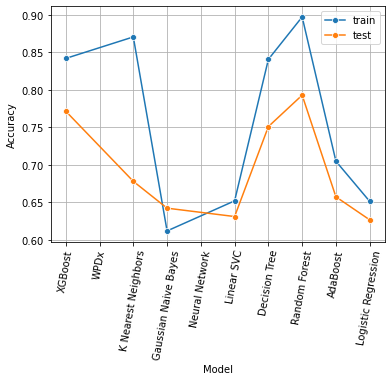

In [8]:
#alternative visualisaiton-lineplot
plt.plot()
sns.lineplot(data=model_comparison_df, y='Accuracy Train', x='Model', palette='rocket', label='train', marker='o')
sns.lineplot(data=model_comparison_df, y='Accuracy Test', x='Model', palette='rocket', label='test', marker='o')
plt.ylabel("Accuracy")
plt.tight_layout()
plt.grid()
plt.legend()
plt.xticks(rotation=80)
plt.show() 

The models which overfits the most are the ones with the largest gap between their train and test set accuracy scores. These are KNN and, to a lesser extent, Random Forest.

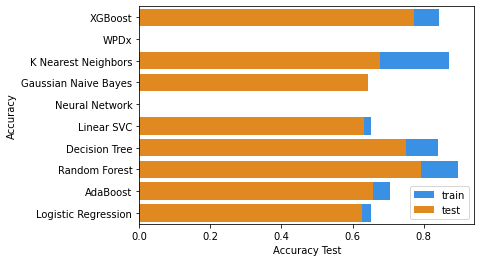

In [9]:
#alternative visualisaiton-bar chart
plt.plot()
sns.barplot(data=model_comparison_df, x='Accuracy Train', y='Model', label='train', color='dodgerblue')
sns.barplot(data=model_comparison_df, x='Accuracy Test', y='Model' , label='test', color='darkorange')
plt.ylabel("Accuracy")
plt.legend()
plt.show() 

Similarly, the blue bar tells us how much better a training set performs versus it's test set, and KNN clearly shows that it is the case, suggesting heavy overfitting.

# Plot Precision/Recall/F1 for Functioning/Non-functioning Test

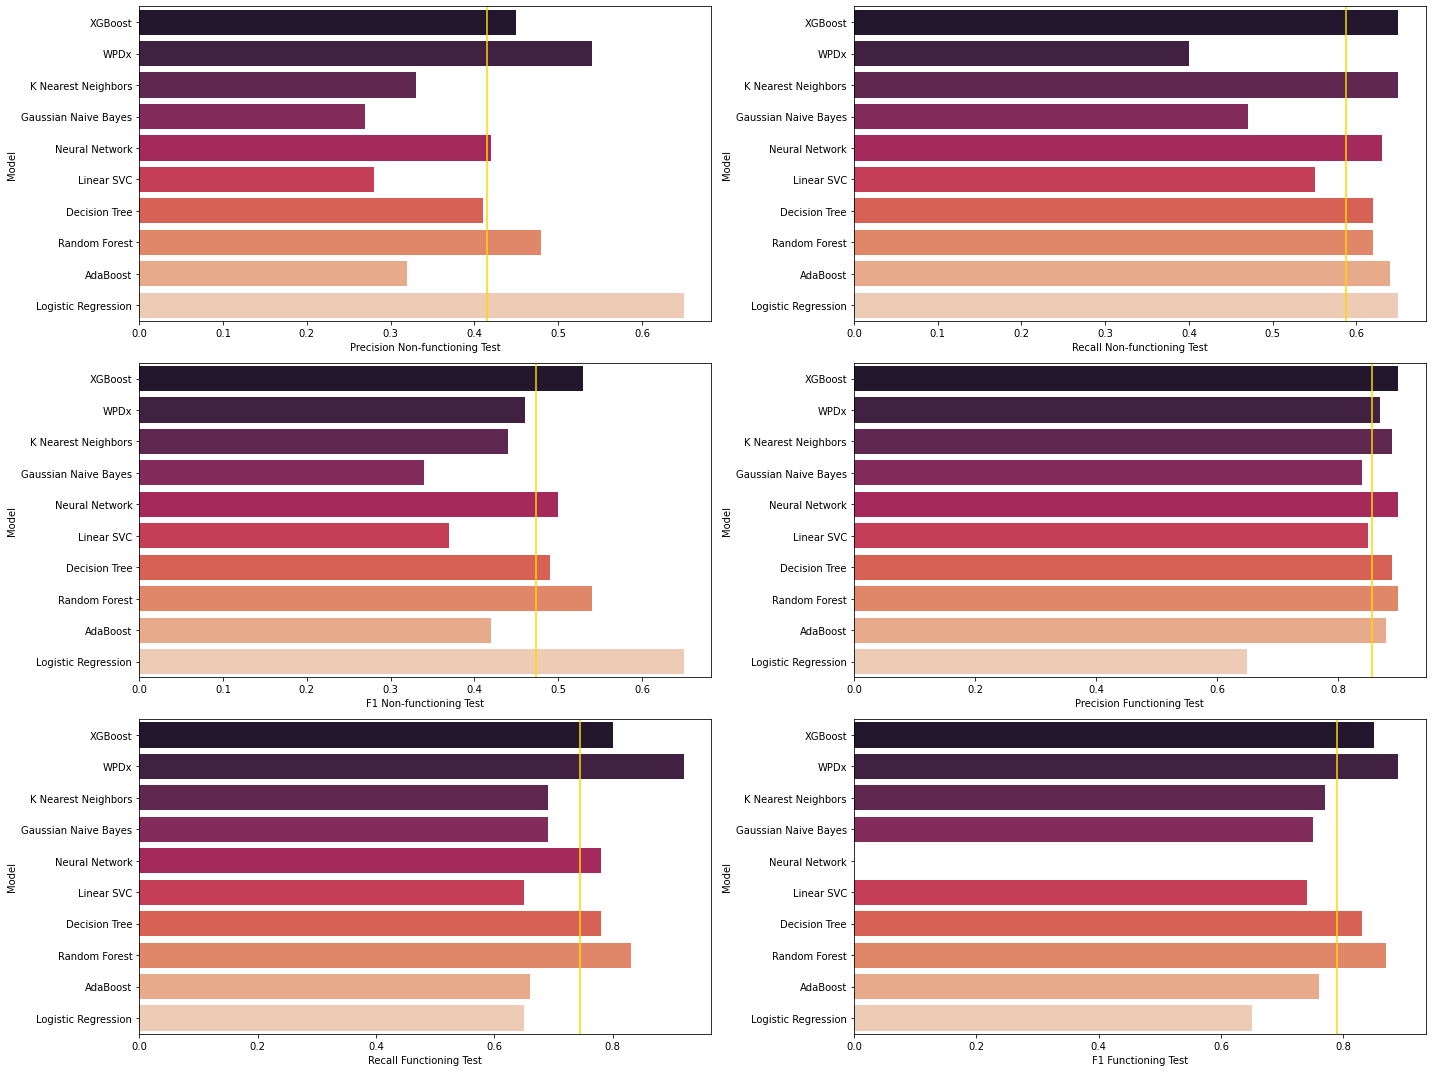

In [10]:
#list of metrics
metrics=['Precision Non-functioning Test', 'Recall Non-functioning Test', 'F1 Non-functioning Test', 'Precision Functioning Test',\
    'Recall Functioning Test', 'F1 Functioning Test']

#visualise through a subplot
plt.subplots(3,2, figsize=(20,15))

for i, metric in enumerate(metrics, 1):
    plt.subplot(3,2,i)
    sns.barplot(data=model_comparison_df, x=metric, y='Model', palette='rocket')
    plt.axvline(model_comparison_df[metric].mean(), c='gold', label='mean')
plt.tight_layout()
plt.show()  


We are the most interested in the recall for non-functioning water points. This is the proportion of non-functioning points we miss. For example, our best performing models have a recall on non-functioning water points of around 60%. This means that they miss 40% of non-functioning points. We exoplanined previously why this is our metric of choice: we'd rather have false alarms (sending engineers for repair) than whole communities not having access to water.

XGBoost, KNN, AdaBoost and Logistic Regression all perform relatively well in this metric. We will have to look for other factors to choose our best model.

# Time fit

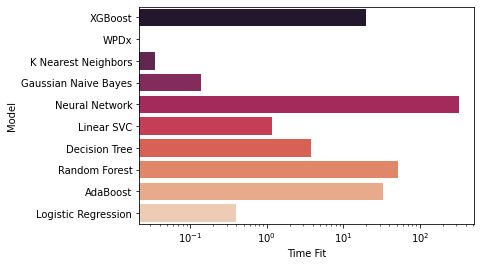

In [11]:
#visualise time to fit models
plt.figure()
sns.barplot(data=model_comparison_df, x='Time Fit', y='Model', palette='rocket')
plt.xscale('log')
plt.show()

The most expensive models to train are Neural Networks and Random Forests, closely followed by XGBoosts and AdaBoosts. KNN is very quick to train as it does not actually need much training. Note that this is a log scale, so the difference between models are relatively large.

# Time predict

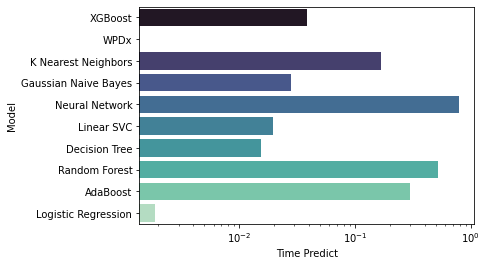

In [12]:
#visualise time to predict outcomes
plt.figure()
sns.barplot(data=model_comparison_df, x='Time Predict', y='Model', palette='mako')
plt.xscale('log')
plt.show()

The prediction time is similar to the fitting time, Neural Networks and Random Forests are very expensive. Note that KNN does need a much longer time to predict than train while it is the oppositfe for the Logistic Regression.

# Final model choice

We will go step by step to choose our model of choice, we start with our 9 models and will eliminate them:

1. XGBoost
2. K Nearest Neighbors
3. Gaussian Naive Bayes
4. Neural Network
5. Linear SVC
6. Decision Tree
7. Random Forest
8. AdaBoost
9. Logistic Regression

A. **Recall score for non-functioning water points on test set**. This is our most important metric. All have very similar scores, except Naive Bays and SVM, which we drop.

1. XGBoost
2. K Nearest Neighbors
3. Neural Network
4. Decision Tree
5. Random Forest
6. AdaBoost
7. Logistic Regression

B. **Overfitting**. KNN overfits the training set and makes us doubt if it would a useful modle on another dataset, so we drop it.

1. XGBoost
2. Neural Network
3. Decision Tree
4. Random Forest
5. AdaBoost
6. Logistic Regression

C. **Training and Predicting Time**. Our neural network takes a very long time to both train and predict, and does not yield much better results, so we drop it.

1. XGBoost
2. Decision Tree
3. Random Forest
4. AdaBoost
5. Logistic Regression

D. **Overall Accuracy scores on test set**. Logistic Regression and AdaBoost perform especially poorly in this field, we drop them.

1. XGBoost
2. Decision Tree
3. Random Forest

E. **AUC on test set**. Decision Tree has a low AUC compared ot our other two models, so we drop it.

1. XGBoost
2. Random Forest

Looking at our various elimination metrics for XGBoost and Random Forest, XGBoost does better for metric A, B and C while Random Forest does better for D and E. Since XGBoost has better scores for the first three metrics (the most immportant ones), we decide to go with **XGBoost** as our final model of choice.

# WPDx Model Comparison

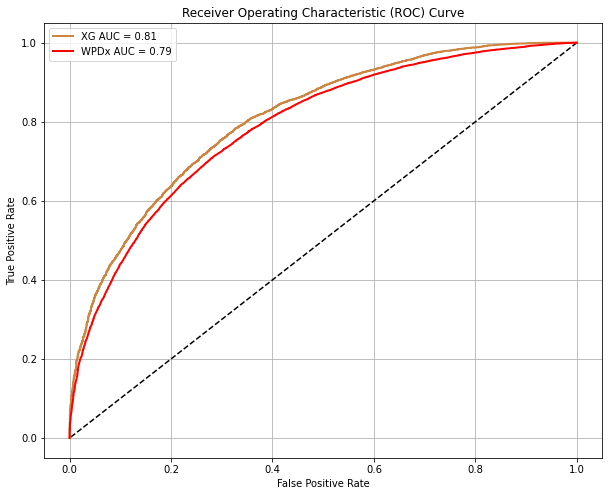

In [13]:
#create visualisation
plt.figure(figsize=(10,8))

plt.plot([1,0], [1,0], color='black', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')

#visualise each roc curve
plt.plot(fpr_test_xg, tpr_test_xg, color='peru', lw=2, label='XG AUC = %0.2f' % auc_test_xg)
plt.plot(fpr_test_wpdx, tpr_test_wpdx, color='Red', lw=2, label='WPDx AUC = %0.2f' % auc_test_wpdx)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc="best")

plt.grid()

Our best model outperforms the WPDx model by a relatively small amount, if we look at the AUC.

In [14]:
#choose xgboost and wpd models
merged_df=model_comparison_df.iloc[0:2,:]

#choose relevant metric
merged_df[['Model', 'Precision Non-functioning Test', 'Recall Non-functioning Test', 'F1 Non-functioning Test', 'Precision Functioning Test',\
    'Recall Functioning Test', 'F1 Functioning Test']]

,Model,Precision Non-functioning Test,Recall Non-functioning Test,F1 Non-functioning Test,Precision Functioning Test,Recall Functioning Test,F1 Functioning Test
0,XGBoost,0.45,0.65,0.53,0.90,0.80,0.85
1,WPDx,0.54,0.40,0.46,0.87,0.92,0.89


We creata a dataframe to make it easier to visualise in the way we want it.

In [15]:
#create data
d = {'Accuracy Metrics': ['Precision Non-functioning Test', 'Recall Non-functioning Test', 'F1 Non-functioning Test', 'Precision Functioning Test',\
    'Recall Functioning Test', 'F1 Functioning Test', 'Precision Non-functioning Test', 'Recall Non-functioning Test', 'F1 Non-functioning Test', 'Precision Functioning Test',\
    'Recall Functioning Test', 'F1 Functioning Test'], 'Model': ['XGBoost', 'XGBoost', 'XGBoost','XGBoost', 'XGBoost', 'XGBoost', 'WPDx', 'WPDx', 'WPDx', 'WPDx', 'WPDx', 'WPDx'], 'Score':[0.45, 0.65, 0.53, 0.90, 0.8, 0.85, 0.54, 0.4, 0.46, 0.87, 0.92, 0.89]}

#create datafrane for easier visualistion
comparison_df=pd.DataFrame(data=d)

#check
comparison_df

,Accuracy Metrics,Model,Score
0,Precision Non-functioning Test,XGBoost,0.45
1,Recall Non-functioning Test,XGBoost,0.65
2,F1 Non-functioning Test,XGBoost,0.53
3,Precision Functioning Test,XGBoost,0.90
4,Recall Functioning Test,XGBoost,0.80
5,F1 Functioning Test,XGBoost,0.85
6,Precision Non-functioning Test,WPDx,0.54
7,Recall Non-functioning Test,WPDx,0.40
8,F1 Non-functioning Test,WPDx,0.46
9,Precision Functioning Test,WPDx,0.87


<Figure size 432x288 with 0 Axes>

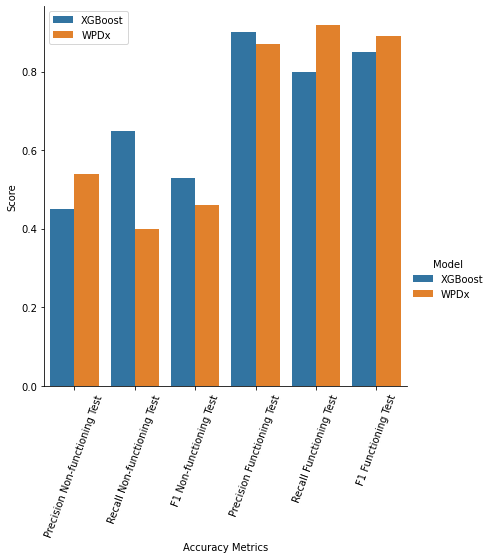

In [16]:
#visualise through barplot
plt.figure()
sns.catplot(data=comparison_df, kind='bar', x='Accuracy Metrics', y='Score', hue='Model', height=6)
plt.legend(loc='best')
plt.xticks(rotation=70)
plt.show() 

Our model performs much better on the recall for non-functioning water points, ours is more than 20 percentage points higher. This is the metric we care the most about. We also perform better on the precision of functioning points.

On the other hand, our model performs not as well on the precision of non-functioning points and recall of functioning points.

Overall, our model outperforms WPDx model and is a net improvement. We will quantify these improvements in our subsequent analysis.

In [17]:
#export to csv for tableau visualisation
model_comparison_df.to_csv(data_filepath+'model_comparison_df.csv')
comparison_df.to_csv(data_filepath+'comparison_df.csv')

# Limitations

The main limitation we have with our dataset is the data. Although we have a wide range of variables, we are still missing more granular and precise variables, especially regarding health outcomes. It would be important to know the mortality rate of each region/water point, especially for children and in general diarrehea and other water-inducing sickness.

Another thing is that I have done a quite heavy feature engineering before running any model. One possibility would not to do those and let the model and regularization choose which features are better at predicting water functionality. I did this heavy feature engineering in an attempt to introduce more qualitative analysis in the project.

Leading on from this, it would be worth spending more time on neural networks, and test more complex architectures with a much larger dataset with more features and see if we can find better accuracy metrics. C7rrently, the limited number of features and the relatively "simple" problem I have posed makes me think that more complex modelling (including neural networks) is not giving us much of an edge. This is also probably why tuning hyperparameters is not helping us much.

In addition, an obvious extension is attempting to use this model in other regions and see if our model has a strong predictive power there. I would expect not as a lot of variables include country-specific features and unobservables.

Finally, the direction of causation between water point functionality, health/education/poverty (in general development indicators) outcomes and conflict is multi-directional, and we may be over-simplifying the problem or just getting the relationhip directions wrong.